<center>
<h style="line-height: 0.5;">

# Applying Machine Learning to Gravitational Lens Modeling
## Mock Lens Tests

</h>
</center>

In [2]:
# imports all the modules needed

import numpy as np
import matplotlib.pyplot as plt
import pygravlens as gl

### Initials

In [3]:
# number of mock lenses
num_mock = 3 # this number SQUARED of mock lenses will be generated

# generates random einstein radii every time this is called... could pose an error
EinsArr = np.sort(np.random.uniform(1.0, 1.5, num_mock)) 

### Using SIS Model to Generate Lenses for Training Data

c:\Users\satya\Documents\GravLensing\pygravlens.py:1641: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


Here is the image array: 
 [[ 1.88991395e+00 -2.38727894e-09]
 [-3.70654308e-01 -1.69009462e-09]
 [-2.45136831e-06 -6.03366585e-14]] 

Here is the magnification array: 
 [ 2.39898670e+00 -5.06905321e-01  2.82833843e-11] 

Here is the time delay array: 
 [0.         1.6954271  1.76323585]

----------------------------Next Mock Lens----------------------------
Here is the image array: 
 [[ 1.94520484e+00  1.76952206e-09]
 [-3.81498162e-01 -7.37736075e-09]
 [-2.45136768e-06 -2.19347635e-14]] 

Here is the magnification array: 
 [ 2.23206809e+00 -5.53198612e-01  2.82833648e-11] 

Here is the time delay array: 
 [0.         1.74502818 1.81482109]

----------------------------Next Mock Lens----------------------------
Here is the image array: 
 [[ 1.99394736e+00  1.09291411e-08]
 [-3.91057739e-01  4.09695859e-09]
 [-2.45136711e-06 -2.80219458e-15]] 

Here is the magnification array: 
 [ 2.11805485e+00 -5.97150575e-01  2.82833472e-11] 

Here is the time delay array: 
 [0.         1.78875474 1

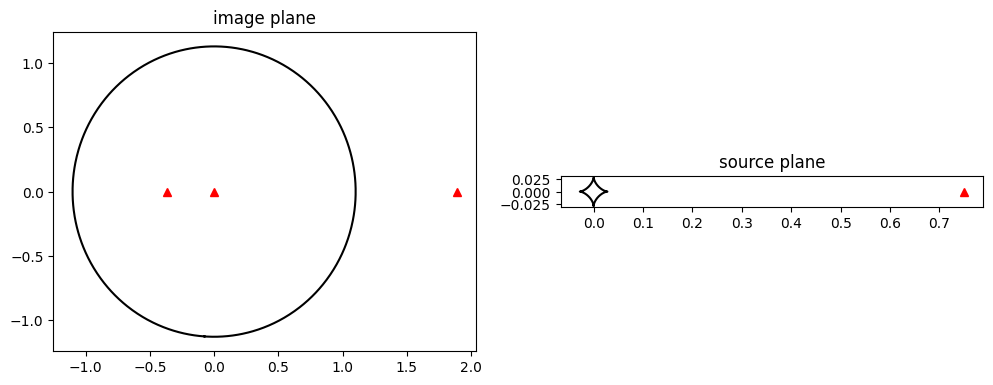

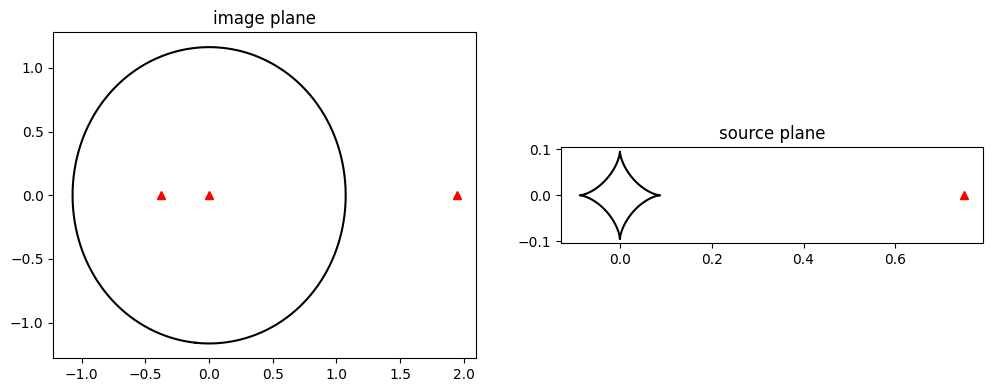

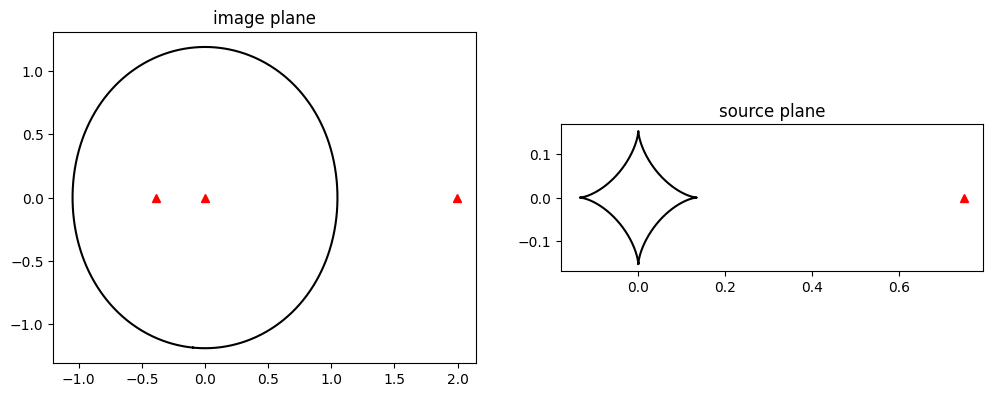

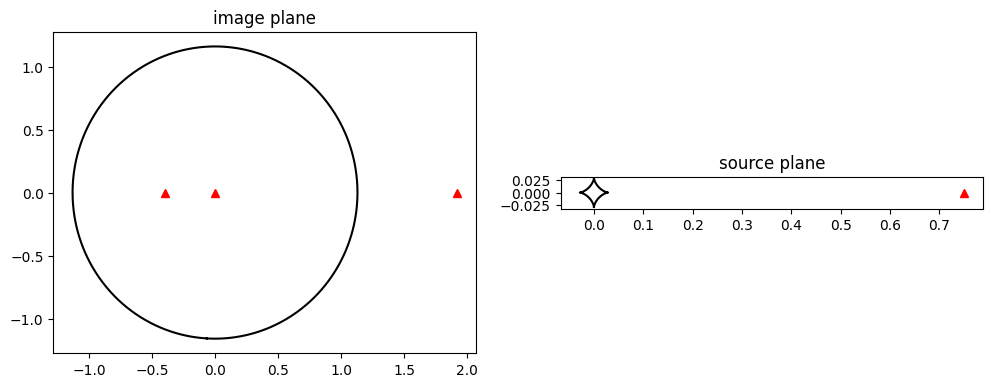

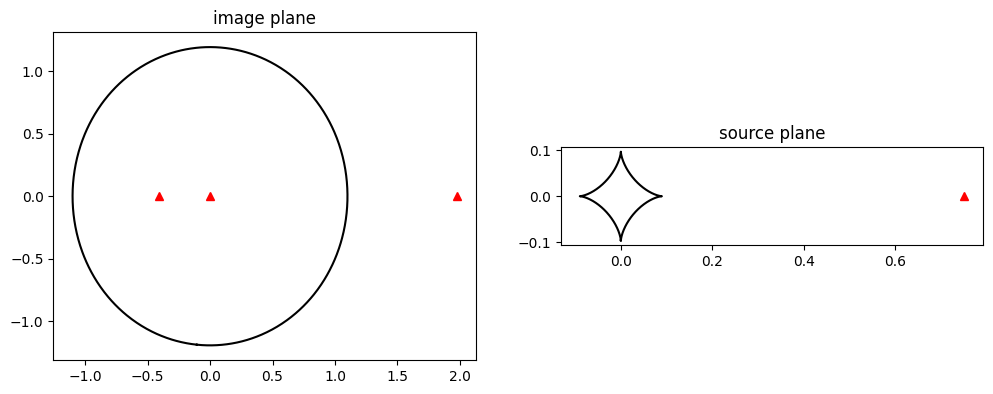

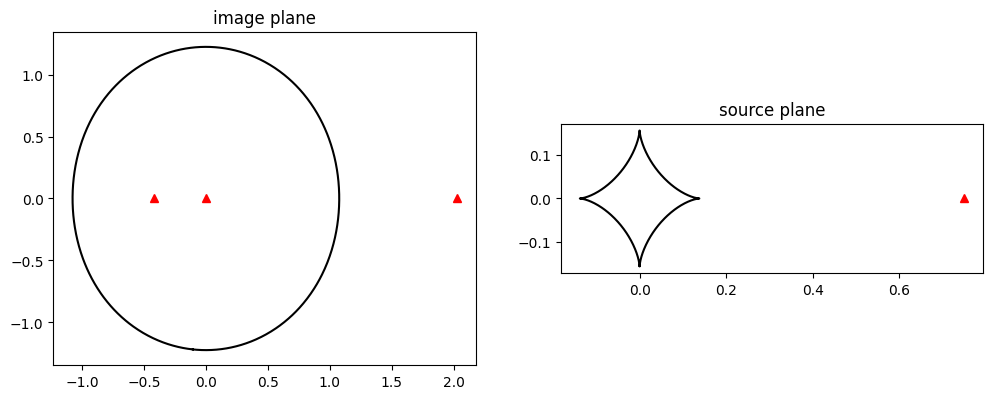

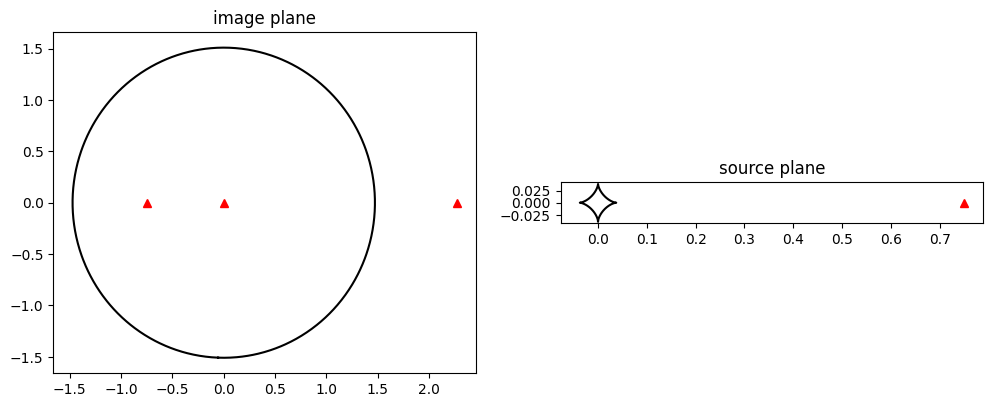

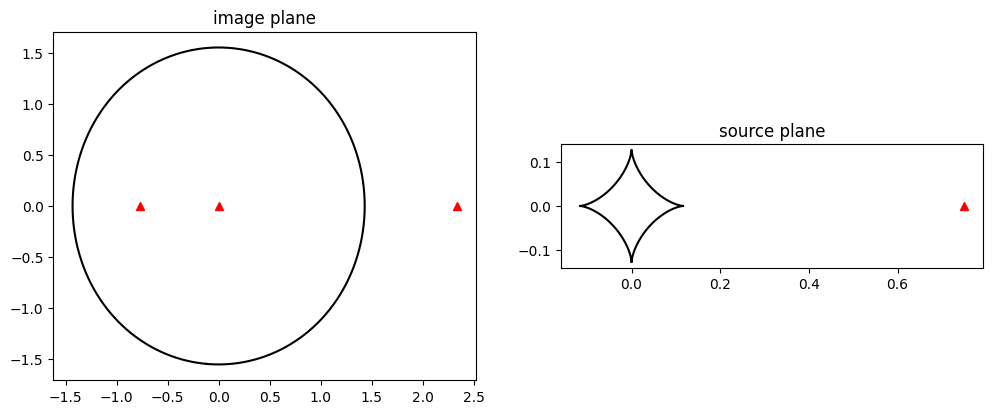

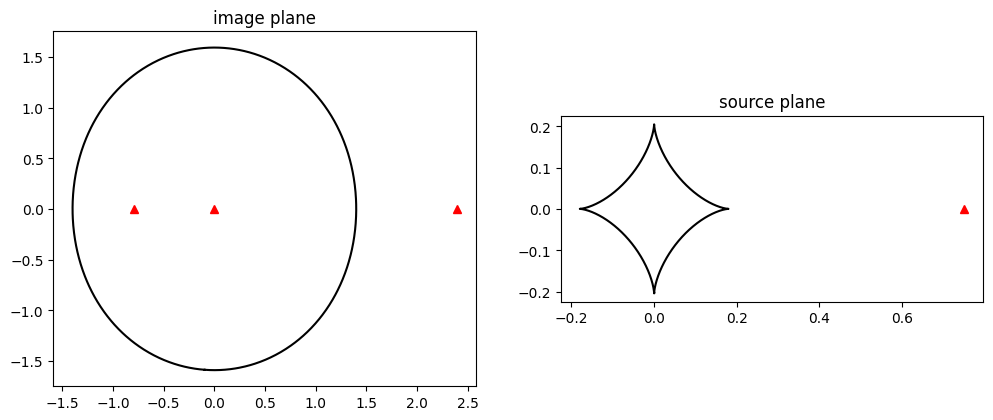

In [4]:
betaOne = 0.75
betaTwo = 0.0 # choose
betaArray= [betaOne, betaTwo] 

# array of randomized shear vals between 0 and 0.1, same size as eins array
shear_vals = np.sort(np.random.uniform(0, 0.1, num_mock))

keys = range(num_mock) # key pairs created for size of EinsArr = number of mock lenses
values = []

# for loop for creating a dictionary with an array of all the img, magnificaiton, and source arrays

for i in range(num_mock):
    # use model.findimg and pass it the beta values to find image pos
    # need to find source positions and give the model source positions to find images.
    for j in range(num_mock):
        plane_iso = gl.lensplane('SIS', [0.0, 0.0, EinsArr[i]], gammac=shear_vals[j])
        model_iso = gl.lensmodel([plane_iso])
        model_iso.tile()
        imgarr,muarr,tarr = model_iso.findimg(betaArray)
        # values is a 2d array containing the img positions, magnifications, and time delay of each einstein radius.
        iso_dict = dict(img=imgarr, mu=muarr, time=tarr)
        values.append(iso_dict)
        model_iso.plot(src=betaArray) # plots the images for each eins radius - used this check if the code was working
# assigns values to each key, each key represents the 
# index of the Einstein Radius in the Einstein Radius array 
# to which the specific img positons, magnifications, and time delays correspond to.


# notice that some arrays aren't two dimensional, and that's because of how the for loop gave the img, mu, and time delay array output.
# sometimes for loop from above gave img array but other times it gave just a singular value for the img.

for diction in values:
    print('Here is the image array: \n', diction["img"], '\n')
    print('Here is the magnification array: \n', diction["mu"], '\n')
    print('Here is the time delay array: \n', diction["time"])
    print()
    print('----------------------------Next Mock Lens----------------------------')

### Using $\gamma_s$ Instead

Here is the image array: 
 [[ 1.87030514e+00  2.65477403e-01]
 [-3.64912643e-01  1.03056024e-02]
 [-2.45136857e-06  4.64730761e-13]] 

Here is the magnification array: 
 [ 2.40717517e+00 -4.83020324e-01  2.82833926e-11] 

Here is the time delay array: 
 [0.         1.68856257 1.7554019 ]

----------------------------Next Mock Lens----------------------------
Here is the image array: 
 [[ 1.87252253e+00  3.18924562e-01]
 [-3.64434834e-01  1.24266180e-02]
 [-2.45136847e-06  5.47992507e-13]] 

Here is the magnification array: 
 [ 2.37404178e+00 -4.80782879e-01  2.82833900e-11] 

Here is the time delay array: 
 [0.         1.69526711 1.76205601]

----------------------------Next Mock Lens----------------------------
Here is the image array: 
 [[ 1.87371366e+00  3.42845288e-01]
 [-3.64189230e-01  1.33828443e-02]
 [-2.45136853e-06  5.90554329e-13]] 

Here is the magnification array: 
 [ 2.35783453e+00 -4.79637174e-01  2.82833915e-11] 

Here is the time delay array: 
 [0.         1.69871603 1

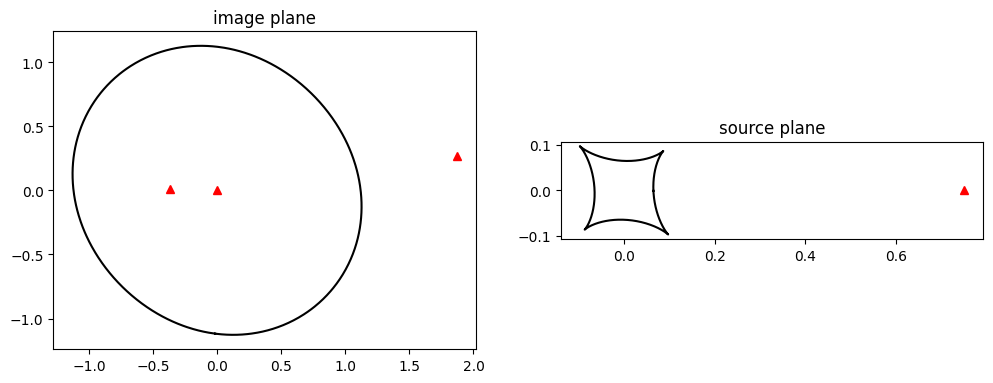

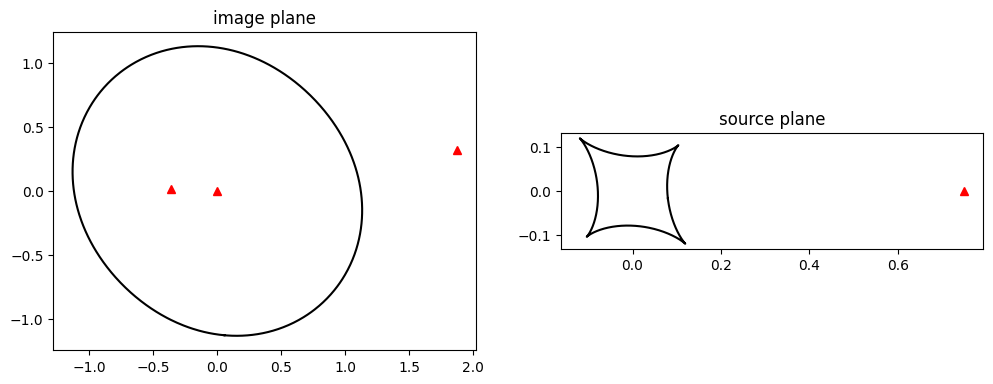

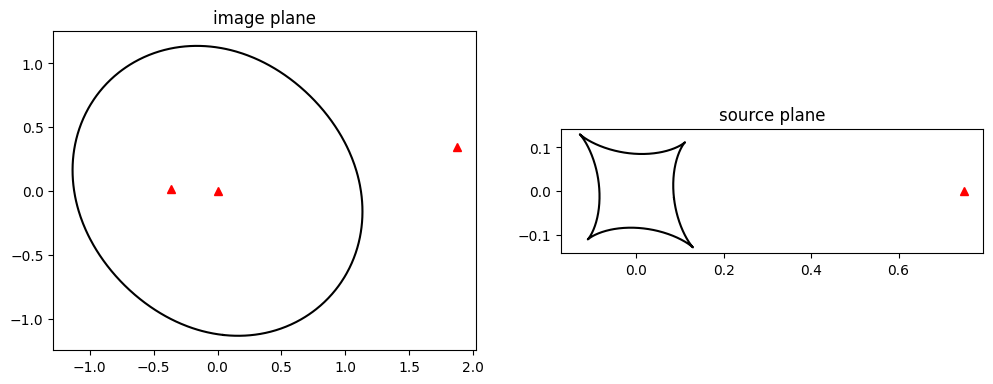

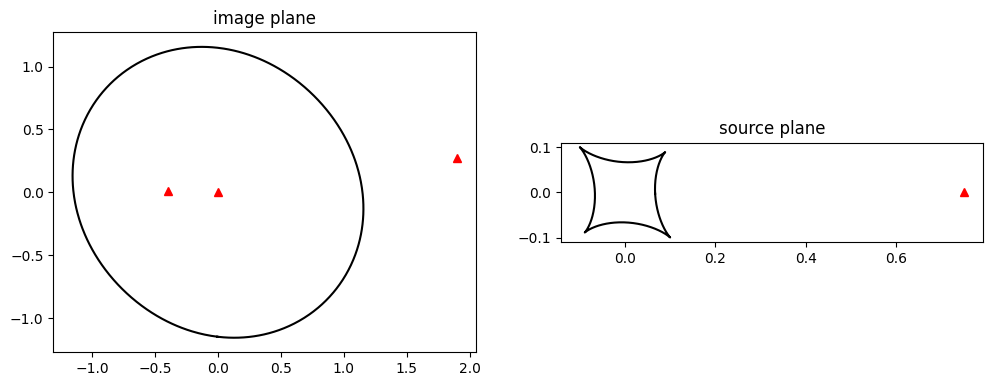

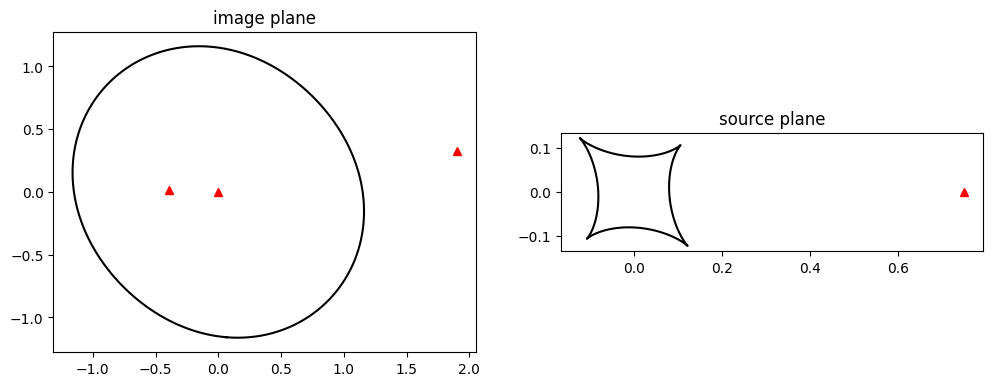

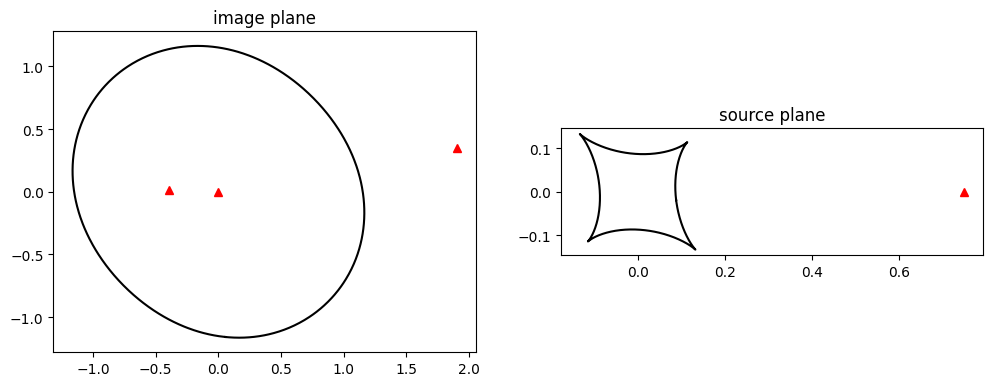

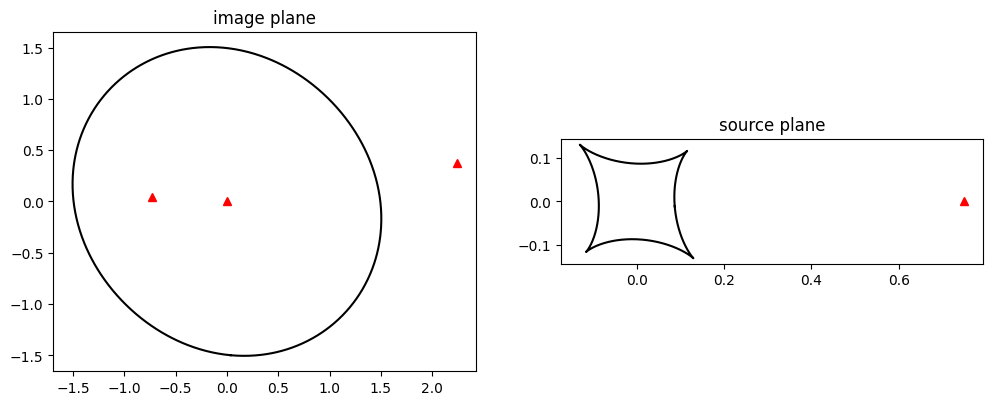

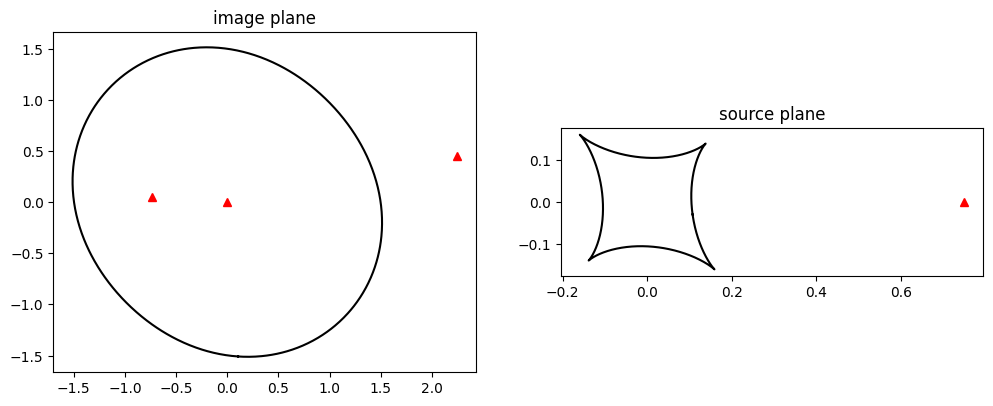

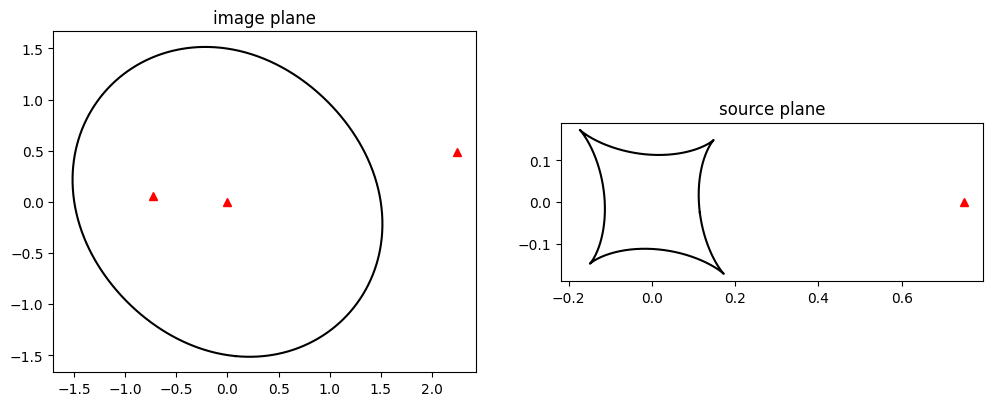

In [5]:
# Using SIS Model to Generate Lenses for Training Data
betaOne = 0.75
betaTwo = 0.0 # choose
betaArray= [betaOne, betaTwo] 

# array of randomized shear vals between 0 and 0.1, same size as eins array
shear_vals = np.sort(np.random.uniform(0, 0.1, num_mock))

keys = range(num_mock) # key pairs created for size of EinsArr = number of mock lenses
values = []

# for loop for creating a dictionary with an array of all the img, magnificaiton, and source arrays

for i in range(num_mock):
    # use model.findimg and pass it the beta values to find image pos
    # need to find source positions and give the model source positions to find images.
    for j in range(num_mock):
        plane_iso = gl.lensplane('SIS', [0.0, 0.0, EinsArr[i]], gammas=shear_vals[j])
        model_iso = gl.lensmodel([plane_iso])
        model_iso.tile()
        imgarr,muarr,tarr = model_iso.findimg(betaArray)
        # values is a 2d array containing the img positions, magnifications, and time delay of each einstein radius.
        iso_dict = dict(img=imgarr, mu=muarr, time=tarr)
        values.append(iso_dict)
        model_iso.plot(src=betaArray) # plots the images for each eins radius - used this check if the code was working
# assigns values to each key, each key represents the 
# index of the Einstein Radius in the Einstein Radius array 
# to which the specific img positons, magnifications, and time delays correspond to.

# notice that some arrays aren't two dimensional, and that's because of how the for loop gave the img, mu, and time delay array output.
# sometimes for loop from above gave img array but other times it gave just a singular value for the img.

for diction in values:
    print('Here is the image array: \n', diction["img"], '\n')
    print('Here is the magnification array: \n', diction["mu"], '\n')
    print('Here is the time delay array: \n', diction["time"])
    print()
    print('----------------------------Next Mock Lens----------------------------')

### Holding Einstein Radius Constant (with Changing Shear)

[0.00611957 0.13544096 0.29597698]
Here is the image array: 
 [[-1.00615625e+00  2.99795831e-08]
 [ 1.00615625e+00  3.01471193e-08]
 [ 2.68110525e-08 -9.93916649e-01]
 [-3.66167741e-08  9.93916649e-01]
 [-7.29042875e-15  2.97722447e-15]] 

Here is the magnification array: 
 [ 8.22082200e+01  8.22082242e+01 -8.12081832e+01 -8.12081828e+01
  4.00001600e-12] 

Here is the time delay array: 
 [0.00000000e+00 6.23391339e-10 6.11978937e-03 6.11978943e-03
 5.03064498e-01]

----------------------------Next Mock Lens----------------------------
Here is the image array: 
 [[ 1.15665802e+00 -2.99551039e-08]
 [-1.15665800e+00 -1.29836416e-08]
 [ 2.78245425e-08 -8.80714102e-01]
 [ 2.78245428e-08  8.80714102e-01]
 [ 6.70096156e-15 -4.13658420e-15]] 

Here is the magnification array: 
 [ 4.26997847e+00  4.26997864e+00 -3.25129156e+00 -3.25129156e+00
  4.00001600e-12] 

Here is the time delay array: 
 [0.00000000e+00 1.40656721e-08 1.37971688e-01 1.37971688e-01
 5.78315245e-01]

----------------------

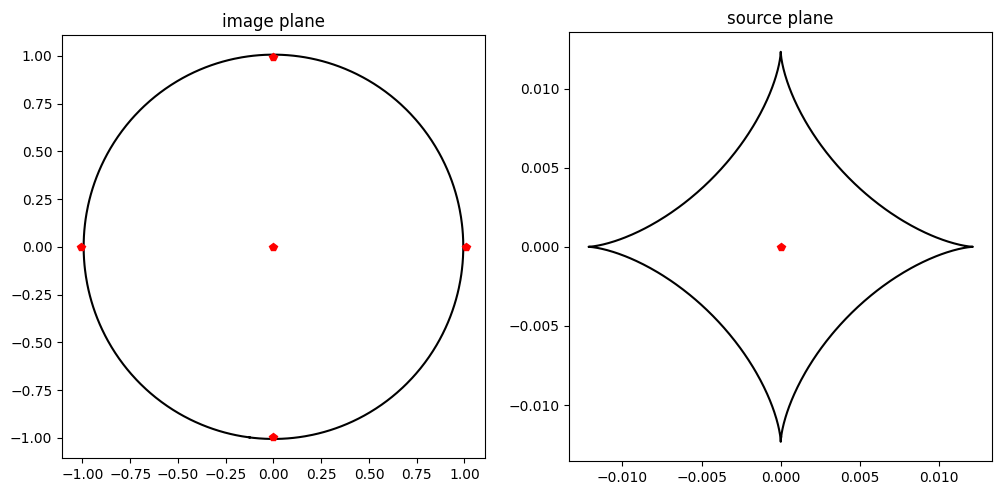

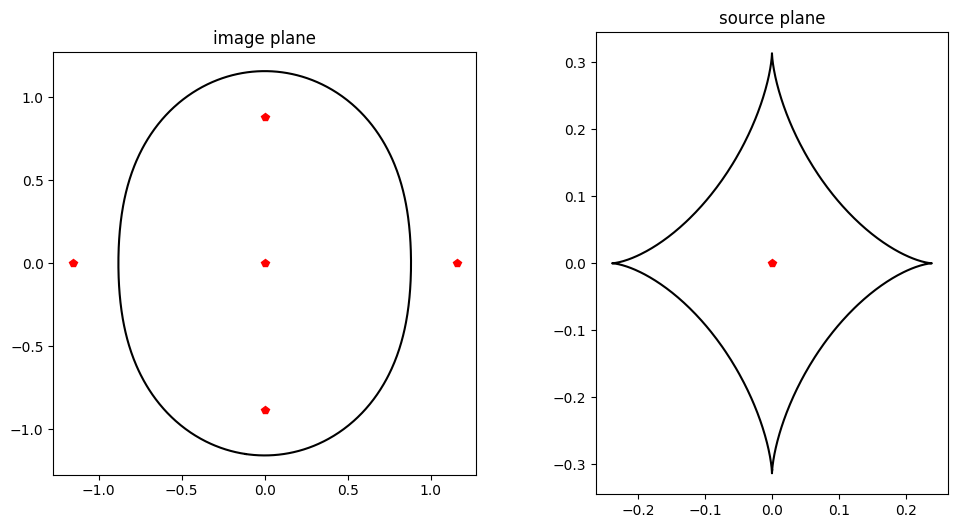

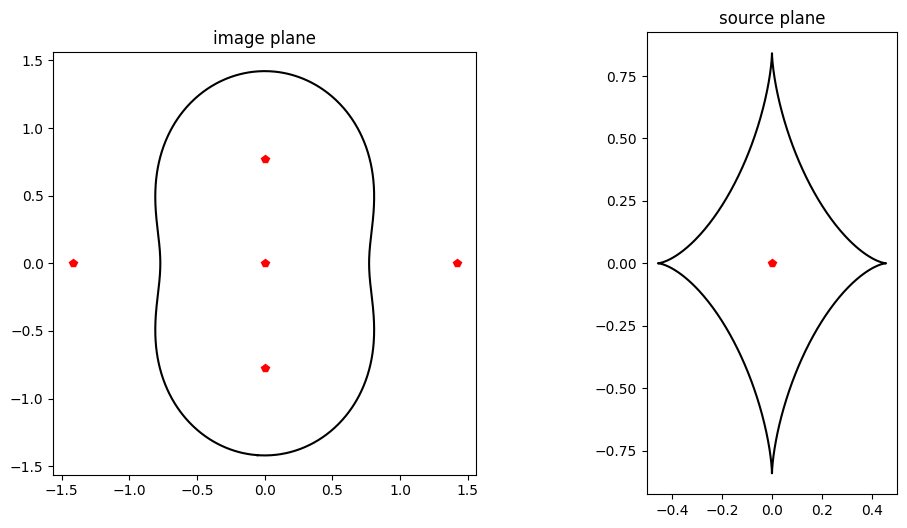

In [6]:
# generates random einstein radii every time this is called... could pose an error
EinsVal = 1.0

# Using SIS Model to Generate Lenses for Training Data
betaOne = 0
betaTwo = 0.0 # choose
betaArray= [betaOne, betaTwo] 

# array of randomized shear vals between 0 and 0.3 (larger bc i wanted the change to be clear), same size as eins array
shear_vals = np.sort(np.random.uniform(0, 0.3, num_mock)) #print out the list
print(shear_vals)

keys = range(num_mock) # key pairs created for size of EinsArr = number of mock lenses
values = []

# for loop for creating a dictionary with an array of all the img, magnificaiton, and source arrays

# use model.findimg and pass it the beta values to find image pos
# need to find source positions and give the model source positions to find images.
for j in range(num_mock):
    plane_iso = gl.lensplane('SIS', [0.0, 0.0, EinsVal], gammac=shear_vals[j])
    model_iso = gl.lensmodel([plane_iso])
    model_iso.tile()
    imgarr,muarr,tarr = model_iso.findimg(betaArray)
    # values is a 2d array containing the img positions, magnifications, and time delay of each einstein radius.
    iso_dict = dict(img=imgarr, mu=muarr, time=tarr)
    values.append(iso_dict)
    model_iso.plot(src=betaArray)# plots the images for each eins radius - used this check if the code was working
# assigns values to each key, each key represents the 
# index of the Einstein Radius in the Einstein Radius array 
# to which the specific img positons, magnifications, and time delays correspond to.

for diction in values:
    print('Here is the image array: \n', diction["img"], '\n')
    print('Here is the magnification array: \n', diction["mu"], '\n')
    print('Here is the time delay array: \n', diction["time"])
    print()
    print('----------------------------Next Mock Lens----------------------------')

### Elliptical Power Law Effects vs. Shear

[0.04866101 0.13118042 0.39437328]


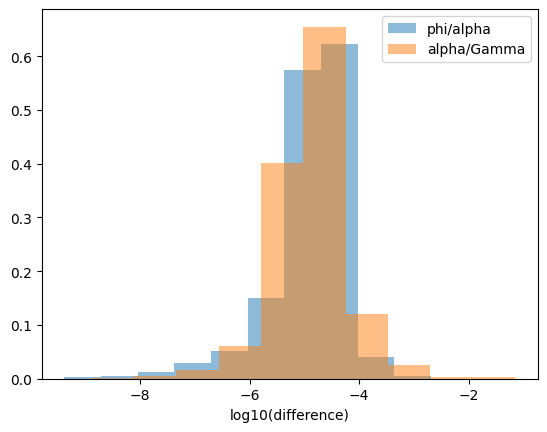

c:\Users\satya\Documents\GravLensing\pygravlens.py:1571: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


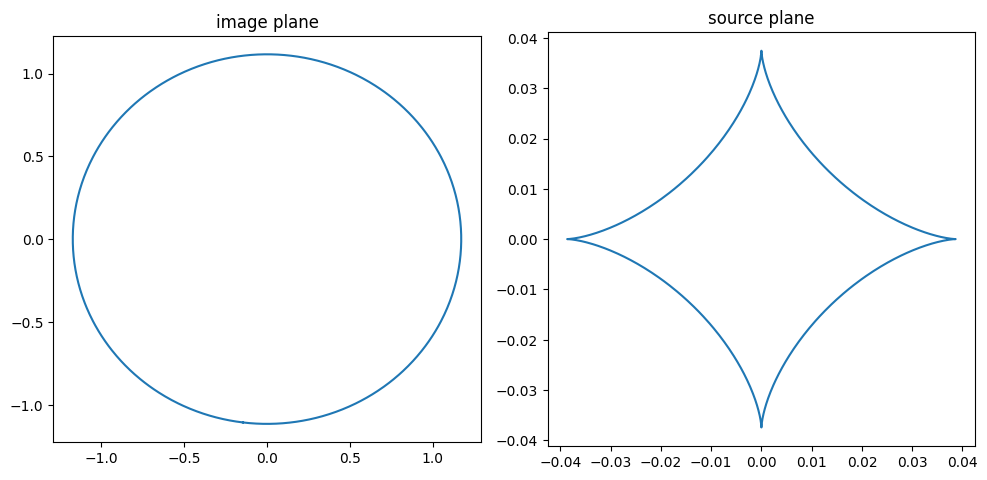

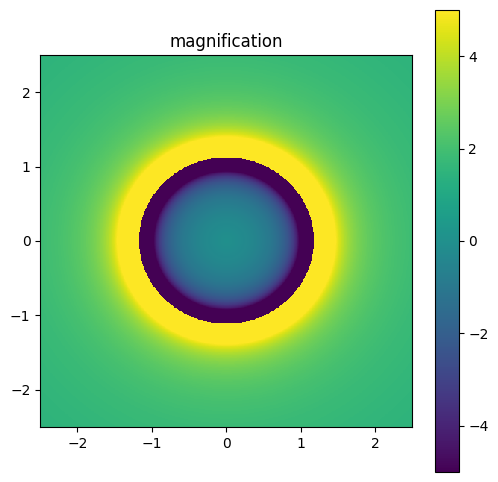

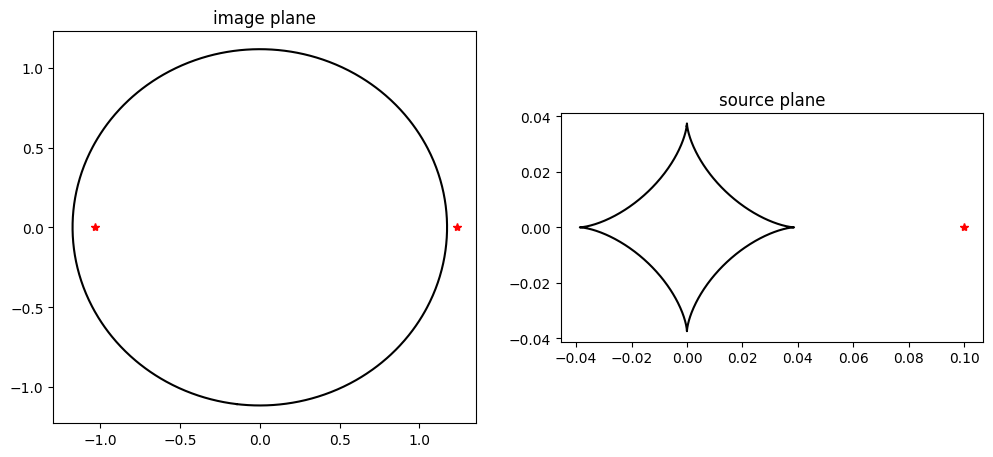

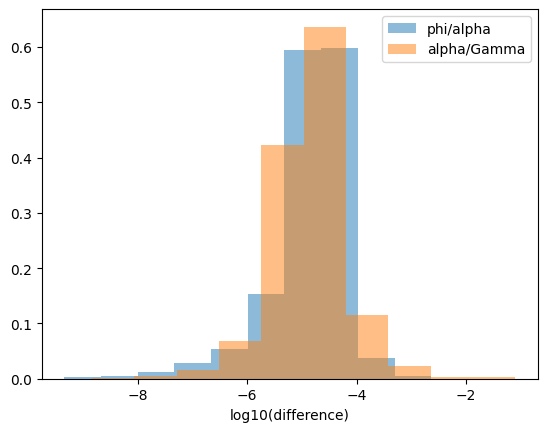

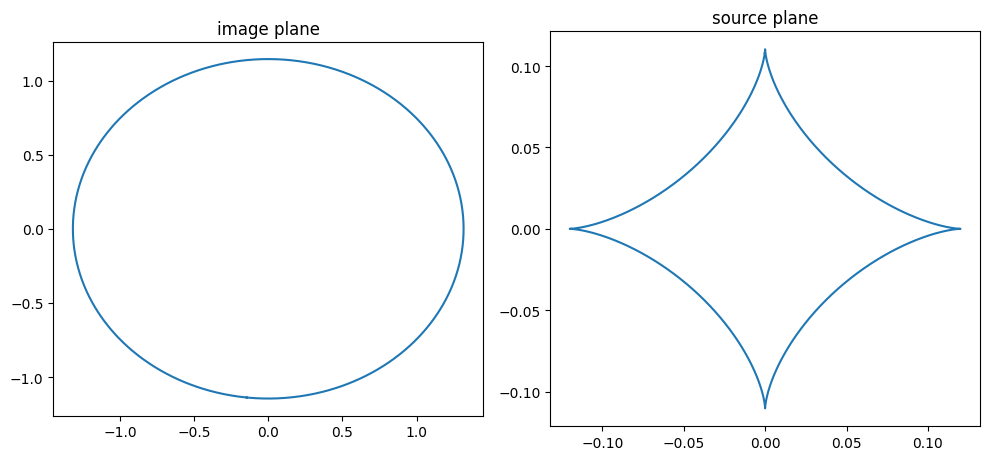

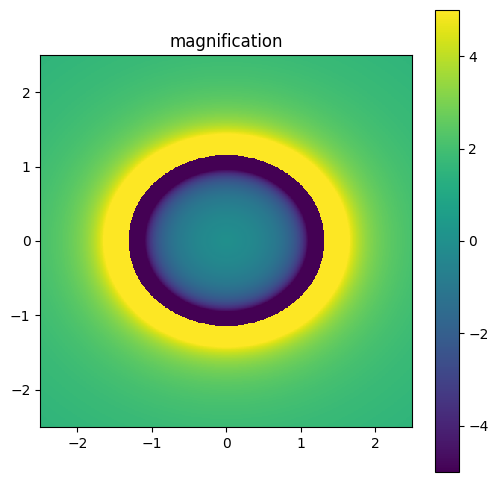

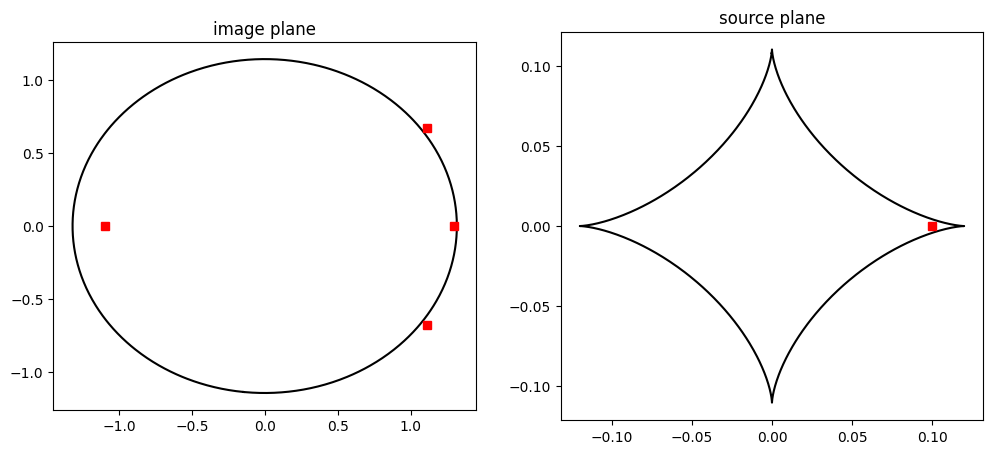

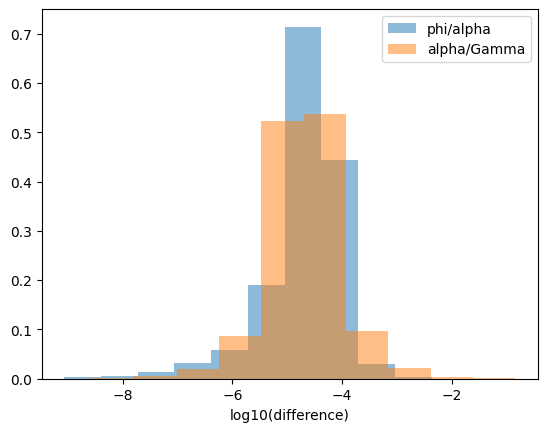

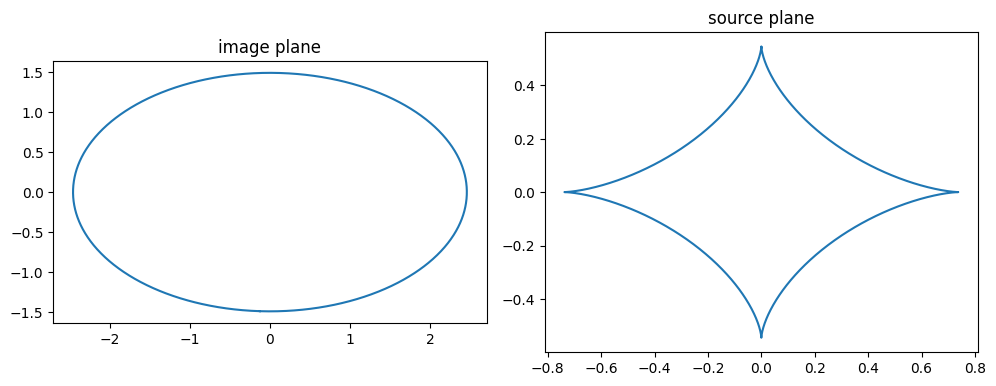

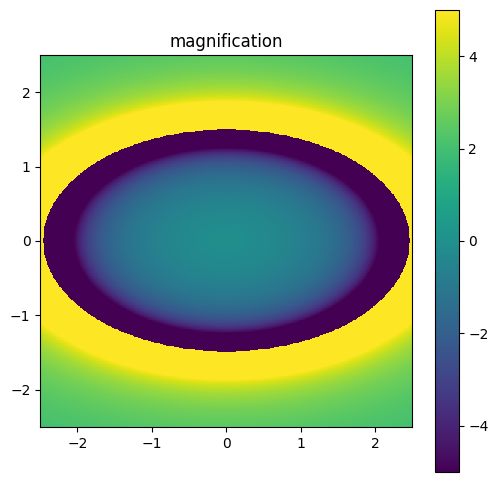

Here is the image array: 
 [[ 1.23442019e+00  3.36205600e-09]
 [-1.03442019e+00  2.73125601e-08]] 

Here is the magnification array: 
 [20.11119868 -7.462258  ] 

Here is the time delay array: 
 [0.         0.22688405]

----------------------------Next Mock Lens----------------------------
Here is the image array: 
 [[ 1.10956198e+00  6.75533827e-01]
 [ 1.10956201e+00 -6.75533777e-01]
 [ 1.29758779e+00 -2.08016357e-08]
 [-1.09758779e+00  1.35619934e-08]] 

Here is the magnification array: 
 [ 36.34022864  36.34023686 -64.87131835  -4.98897882] 

Here is the time delay array: 
 [0.00000000e+00 9.48135237e-10 1.86982466e-03 2.41387391e-01]

----------------------------Next Mock Lens----------------------------
Here is the image array: 
 [[ 3.72330223e-01 -2.01040416e+00]
 [ 3.72330224e-01  2.01040416e+00]
 [ 1.82333166e+00  3.70204505e-08]
 [-1.62333165e+00 -4.68847008e-09]] 

Here is the magnification array: 
 [ 3.79681146  3.79681148 -2.86126247 -1.93889155] 

Here is the time delay ar

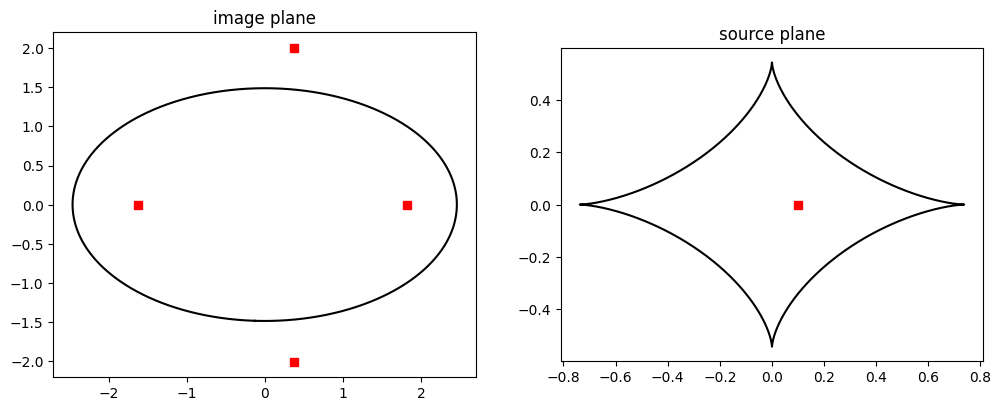

In [7]:
# Using SIS Model to Generate Lenses for Training Data
betaOne = 0.1
betaTwo = 0.0 # choose
betaArray= [betaOne, betaTwo] 

# array of randomized shear vals between 0 and 0.1, same size as eins array
ellip_vals = np.sort(np.random.uniform(0, 0.5, num_mock))
print(ellip_vals)

keys = range(num_mock) # key pairs created for size of EinsArr = number of mock lenses
values = []


xtmp_elpow = np.random.uniform(low=-2,high=2,size=(1000,2))

# for loop for creating a dictionary with an array of all the img, magnificaiton, and source arrays

for i in range(num_mock):
    # use model.findimg and pass it the beta values to find image pos
    # need to find source positions and give the model source positions to find images.
    plane_elpow = gl.lensplane('ellpow',[0.0,0.0,1.0,EinsArr[i],ellip_vals[i],0]) # 3rd param = 1.0 for SIS (power law index); 4th param = einsradius; 5th param = shear
    plane_elpow.check(xtmp_elpow)

    model_elpow = gl.lensmodel([plane_elpow])
    model_elpow.tile()
    model_elpow.plotcrit()
    model_elpow.plotmag()

    imgarr,muarr,tarr = model_elpow.findimg(betaArray)
    # values is a 2d array containing the img positions, magnifications, and time delay of each einstein radius.
    elpow_dict = dict(img=imgarr, mu=muarr, time=tarr)
    values.append(elpow_dict)

    model_elpow.plot(src=betaArray) # plots the images for each eins radius - used this check if the code was working
# assigns values to each key, each key represents the 
# index of the Einstein Radius in the Einstein Radius array 
# to which the specific img positons, magnifications, and time delays correspond to.

for diction in values:
    print('Here is the image array: \n', diction["img"], '\n')
    print('Here is the magnification array: \n', diction["mu"], '\n')
    print('Here is the time delay array: \n', diction["time"])
    print()
    print('----------------------------Next Mock Lens----------------------------')

### Random vals for Source Positions

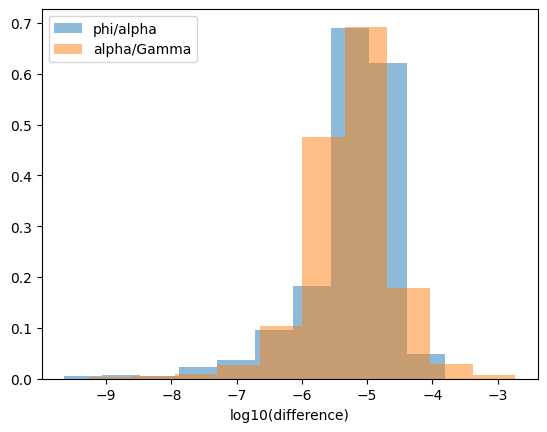

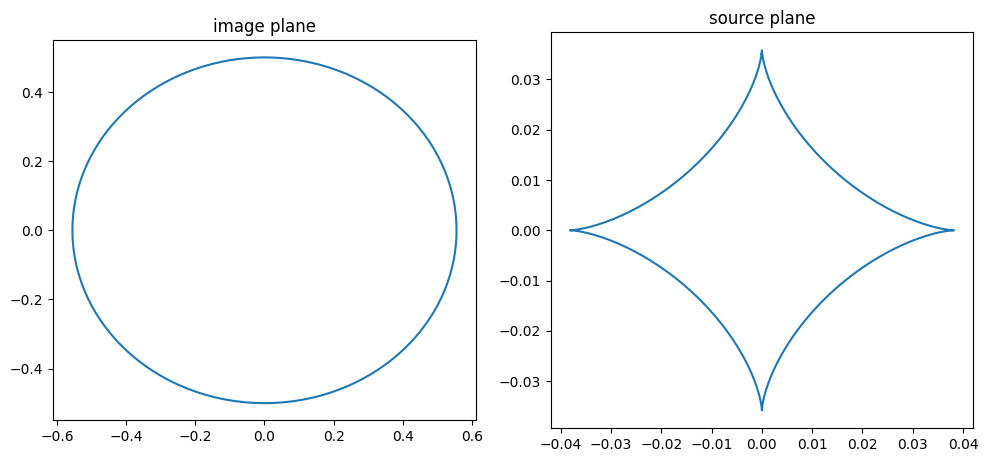

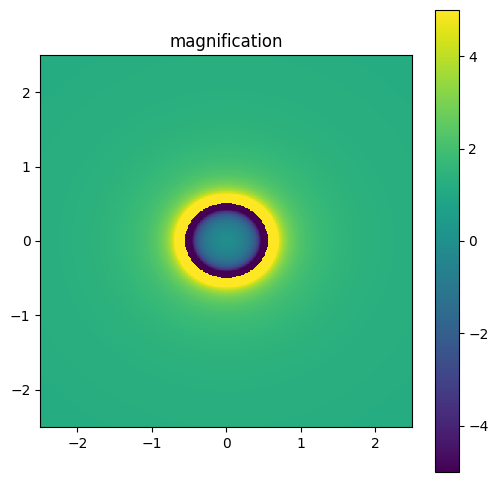

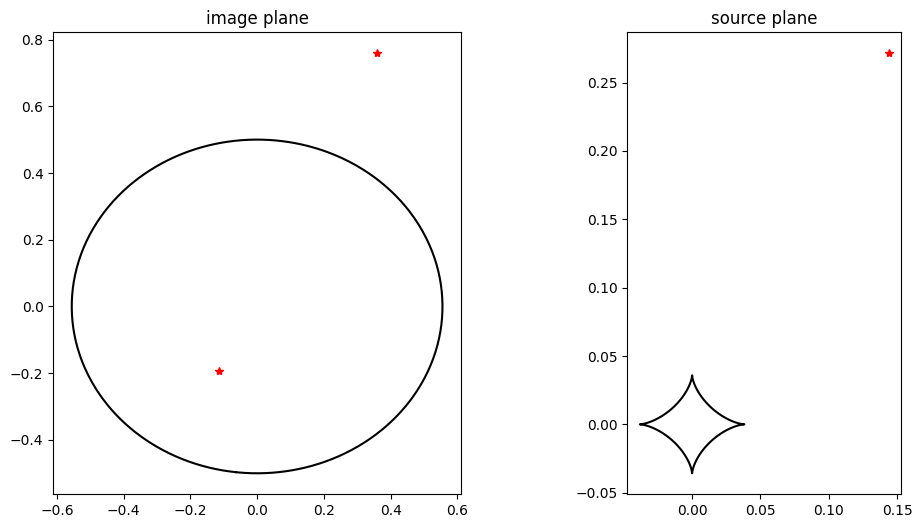

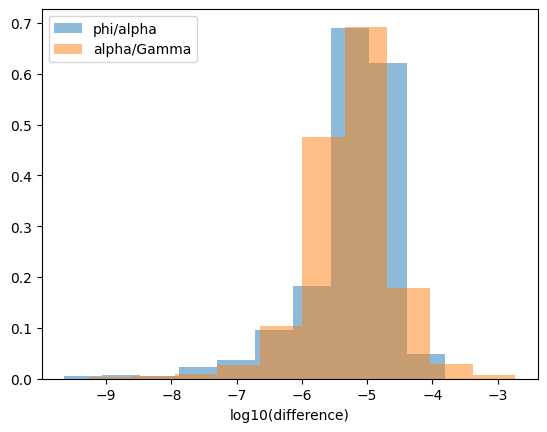

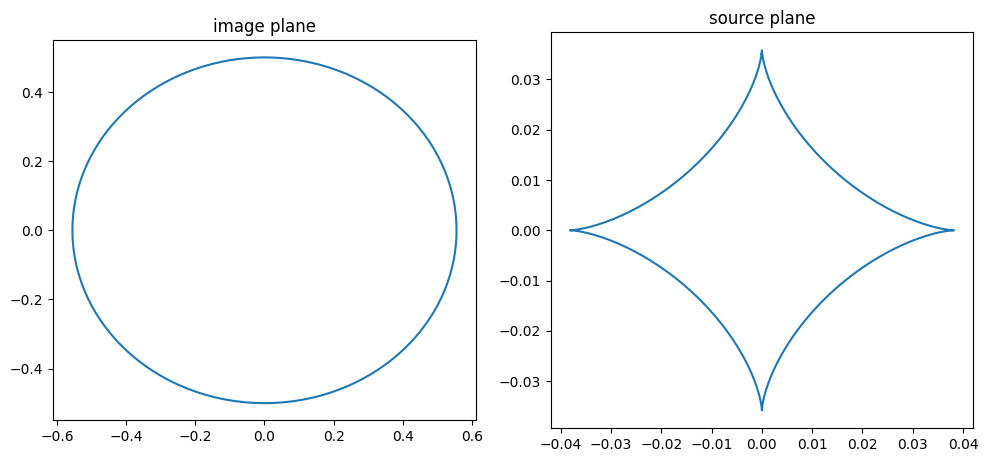

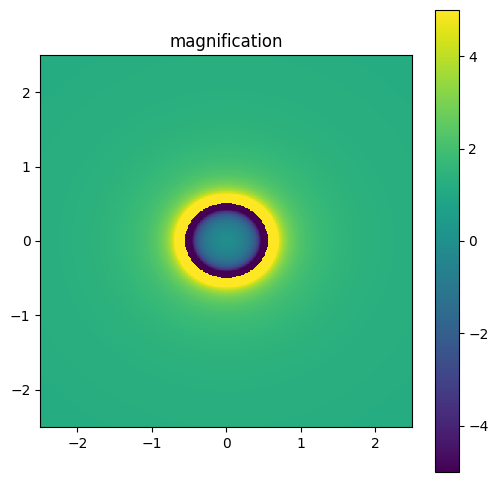

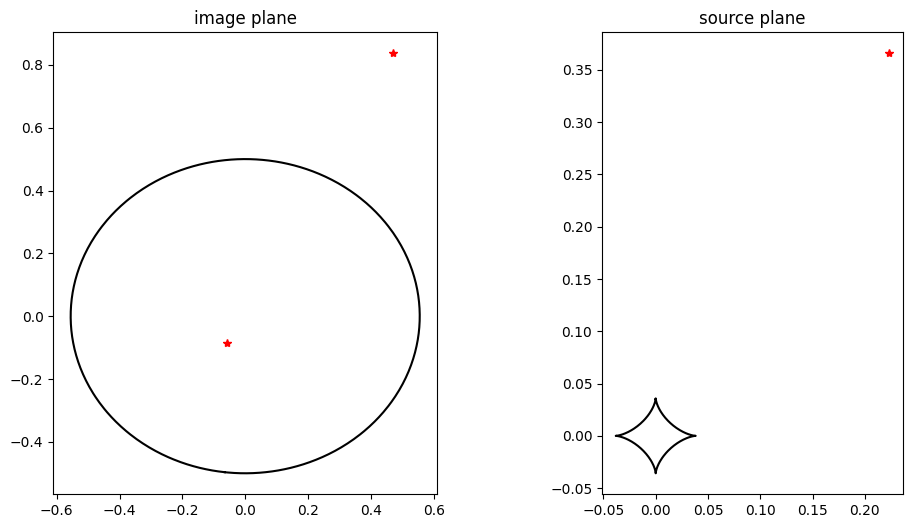

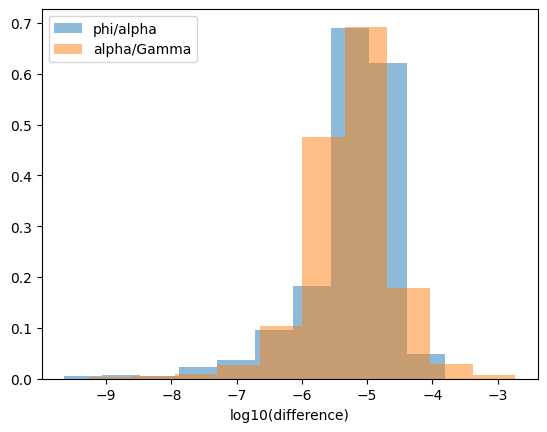

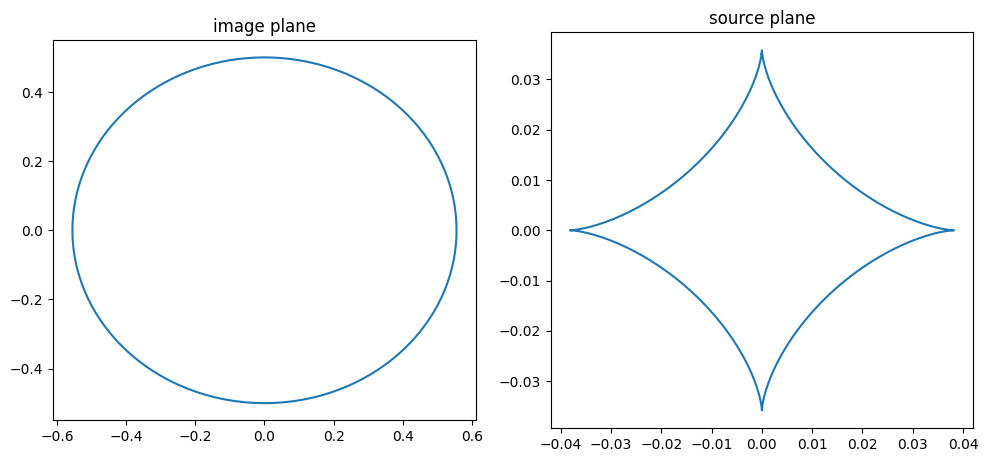

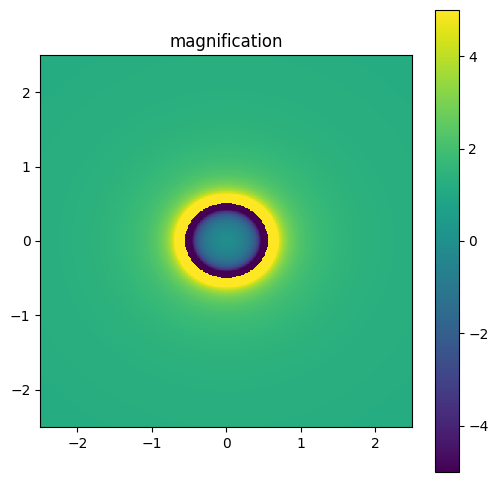

Here is the image array: 
 [[ 0.35905561  0.75877473]
 [-0.11529995 -0.19238841]] 

Here is the magnification array: 
 [ 2.53978246 -0.77676579] 

Here is the time delay array: 
 [0.         0.32717632]

----------------------------Next Mock Lens----------------------------
Here is the image array: 
 [[ 0.47001057  0.83688206]
 [-0.05653769 -0.08494194]] 

Here is the magnification array: 
 [ 2.14229688 -0.24693473] 

Here is the time delay array: 
 [0.         0.45543494]

----------------------------Next Mock Lens----------------------------
Here is the image array: 
 [[0.52892972 1.01824379]] 

Here is the magnification array: 
 [1.80125041] 

Here is the time delay array: 
 [0.]

----------------------------Next Mock Lens----------------------------


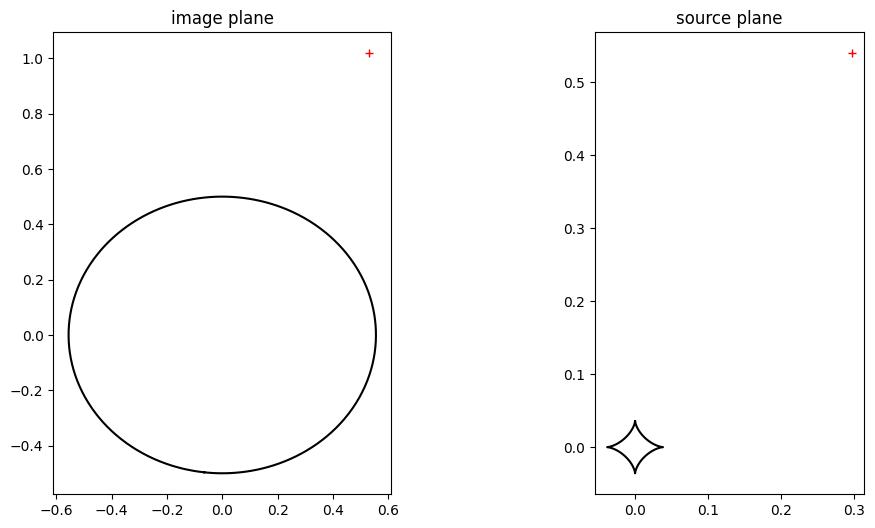

In [8]:
# Using SIS Model to Generate Lenses for Training Data

circ_num = np.sqrt(2) / 2

betaOne = np.sort(np.random.uniform(0.0, circ_num, num_mock))
betaTwo = np.sort(np.random.uniform(0.0, circ_num, num_mock)) # choose

keys = range(num_mock) # key pairs created for size of EinsArr = number of mock lenses
values = []

xtmp_elpow = np.random.uniform(low=-2,high=2,size=(1000,2))

# for loop for creating a dictionary with an array of all the img, magnificaiton, and source arrays

for i in range(num_mock):
    # use model.findimg and pass it the beta values to find image pos
    # need to find source positions and give the model source positions to find images.
    plane_elpow = gl.lensplane('ellpow',[0,0,1.0,0.5,0.1,0]) # 3rd param = 1.0 for SIS (power law index); 4th param = einsradius; 5th param = shear
    plane_elpow.check(xtmp_elpow)

    model_elpow = gl.lensmodel([plane_elpow])
    model_elpow.tile()
    model_elpow.plotcrit()
    model_elpow.plotmag()
    
    
    imgarr,muarr,tarr = model_elpow.findimg([betaOne[i],betaTwo[i]])
    # values is a 2d array containing the img positions, magnifications, and time delay of each einstein radius.
    elpow_dict = dict(img=imgarr, mu=muarr, time=tarr)
    values.append(elpow_dict)

    model_elpow.plot(src=[betaOne[i],betaTwo[i]]) # plots the images for each eins radius - used this check if the code was working
# assigns values to each key, each key represents the 
# index of the Einstein Radius in the Einstein Radius array 
# to which the specific img positons, magnifications, and time delays correspond to.

for diction in values:
    print('Here is the image array: \n', diction["img"], '\n')
    print('Here is the magnification array: \n', diction["mu"], '\n')
    print('Here is the time delay array: \n', diction["time"])
    print()
    print('----------------------------Next Mock Lens----------------------------')
    
